In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.applications import vgg16, VGG16

# EBAnO - Explaining BlAck-box mOdel

In [2]:
def load_image(image_url, target_size):
    img = image.load_img(image_url, target_size=target_size)
    return img

def preprocess_function(img, model_preproc):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return model_preproc(x)

## Load DCNN model

In [3]:
VGG16_model = VGG16(include_top=True, weights='imagenet', classes=1000)

target_size = VGG16_model._feed_input_shapes[0][1:3]
print("target_size:", target_size)
VGG16_model

target_size: (224, 224)


## Load input image

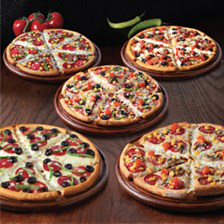

In [4]:
IMAGE_URL = "./demo_input/pizza1.png"

input_image = load_image(IMAGE_URL, target_size)
input_image

## Predicted classes for the input image

In [5]:
# Preprocess image
x = preprocess_function(input_image, vgg16.preprocess_input)

# Predict
predictions = VGG16_model.predict(x)

# Show top-10 predictions
top_preds = 10
decoded_predictions = vgg16.decode_predictions(predictions, top=top_preds)[0]
preds_indexes = np.argsort(predictions[0])[::-1][:top_preds] # Get indexes of top-10 predictions
pd.DataFrame(decoded_predictions, columns=["WNID", "Class name", "Prob."], index=preds_indexes).style.background_gradient()

,WNID,Class name,Prob.
455,n02877765,bottlecap,0.422296
963,n07873807,pizza,0.284991
415,n02776631,bakery,0.078728
927,n07613480,trifle,0.057947
532,n03201208,dining_table,0.028424
868,n04476259,tray,0.024669
746,n04019541,puck,0.016910
923,n07579787,plate,0.015435
762,n04081281,restaurant,0.012150
464,n02910353,buckle,0.007874


## Why should it be a *bottlecap* ?

In [6]:
# Load EBAnO Express
from ebano_express.explainer import LocalExplanationModel

ebano_local_exp_bottlecap = LocalExplanationModel(input_image, 455,
                                        VGG16_model,
                                  preprocess_func=lambda x: preprocess_function(x, vgg16.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=5)

ebano_local_exp_bottlecap.fit_explanation(verbose=True)

Hypecolumns shape: (2560, 224, 224)
Hypecolumns reshaped: (50176, 2560)
Hypecolumns reduced: (50176, 30)
> Computing explanation with '2' features...
> Computing explanation with '3' features...
> Computing explanation with '4' features...
> Computing explanation with '5' features...


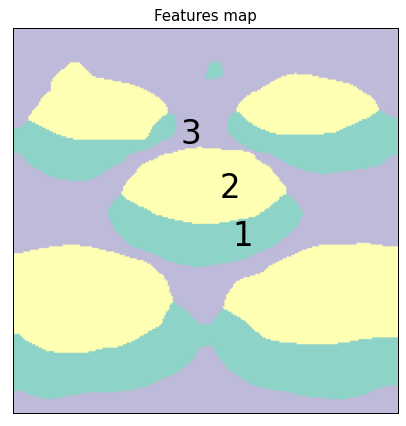

In [7]:
ebano_local_exp_bottlecap.best_explanation.show_features_map()
plt.show()
plt.close()

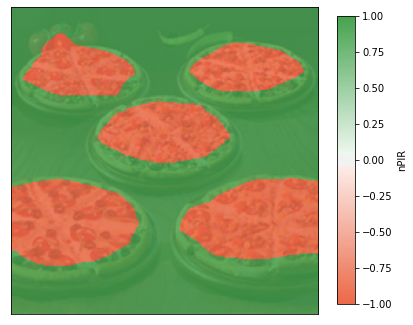

In [8]:
ebano_local_exp_bottlecap.best_explanation.show_visual_explanation()
plt.show()
plt.close()

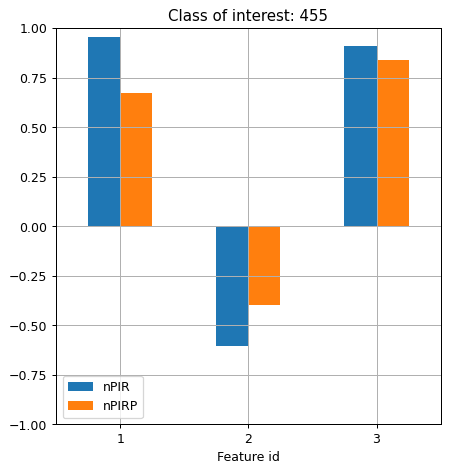

In [9]:
ebano_local_exp_bottlecap.best_explanation.show_numerical_explanation()
plt.show()
plt.close()

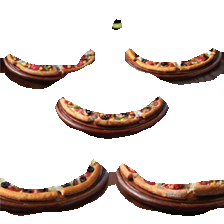

In [10]:
ebano_local_exp_bottlecap.best_explanation.get_interpretable_feature(1)

In [11]:
ebano_local_exp_bottlecap.best_explanation.get_numerical_explanation().loc[1, ["nPIR", "nPIRP"]].to_frame()

,1
nPIR,0.953877
nPIRP,0.674270


## Global explanation

In [12]:
images_p = ["./demo_input/pizza1.png",
            "./demo_input/pizza2.png",
            "./demo_input/pizza3.jpg"]
images = []
for im_p in images_p:
    im = load_image(im_p, target_size)
    images.append(im)

images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FE92B1B5BA8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FE92B1B5860>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE92B1B5CC0>]

## Class-Global explanation for *pizza*

In [13]:
from ebano_express.explainer import ClassGlobalExplanationModel

ebano_global_exp = ClassGlobalExplanationModel(images, 963,
                                               VGG16_model,
                                  preprocess_func=lambda x: preprocess_function(x, vgg16.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=5)


ebano_global_exp.fit_explanation()

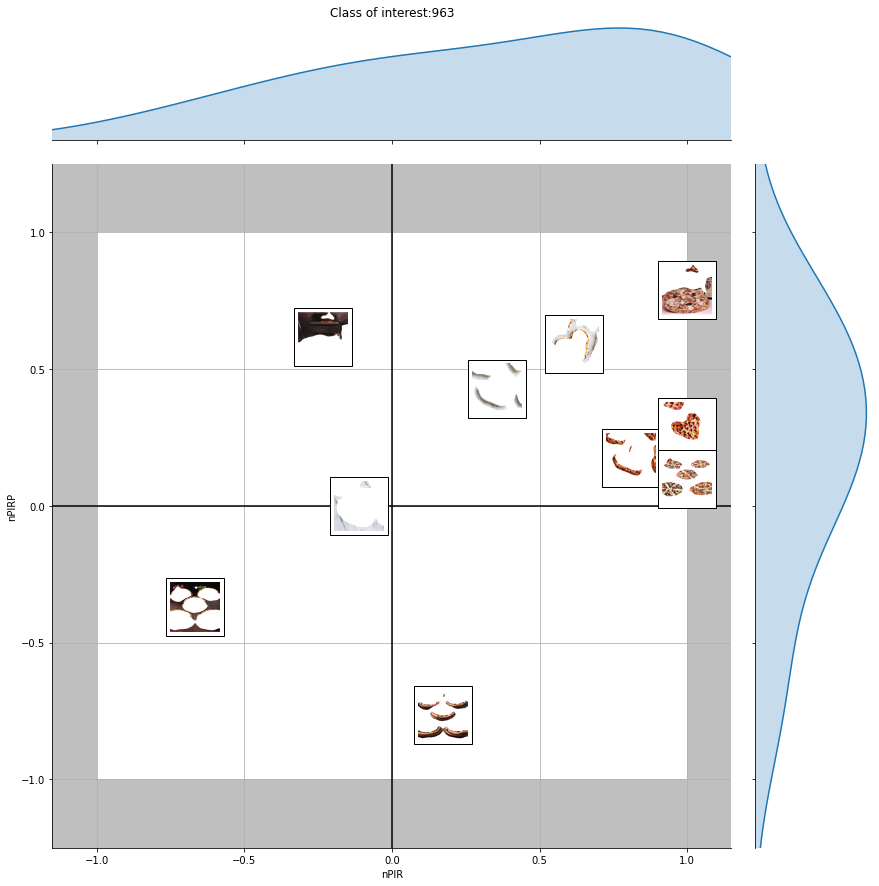

In [14]:
ebano_global_exp.show_global_explanation()
plt.show()
plt.close()


## Class-Global explanation for *bottlecap*

In [15]:
ebano_global_exp_bottlecap = ClassGlobalExplanationModel(images, 455,
                                               VGG16_model,
                                  preprocess_func=lambda x: preprocess_function(x, vgg16.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=5)


ebano_global_exp_bottlecap.fit_explanation()

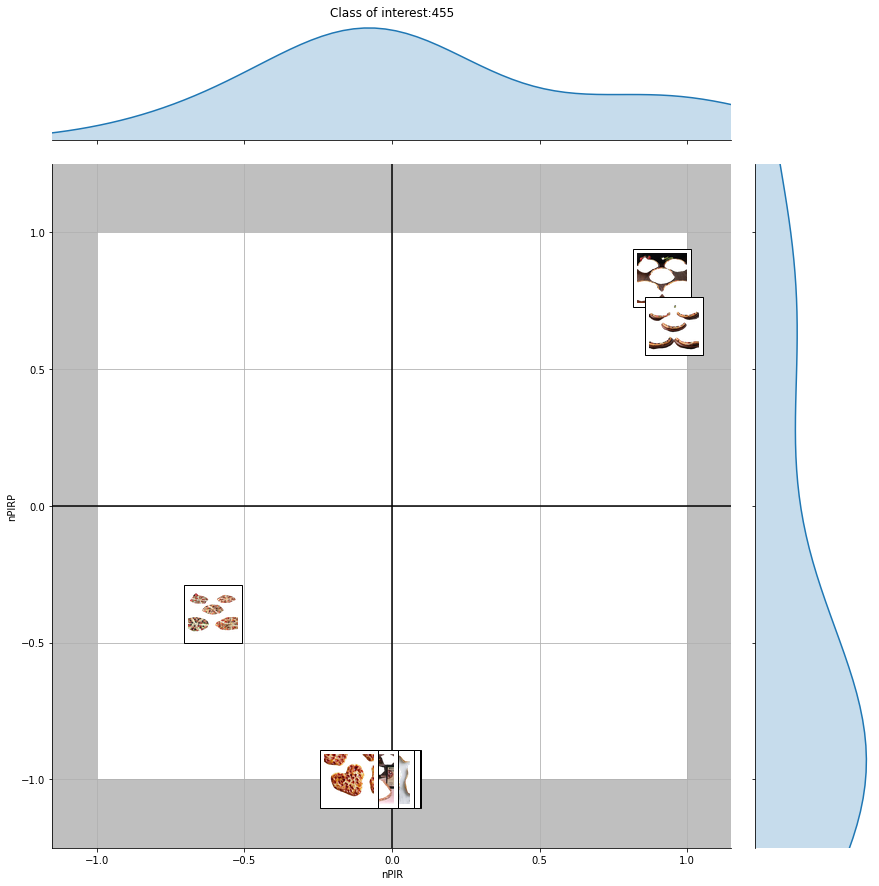

In [16]:
ebano_global_exp_bottlecap.show_global_explanation()
plt.show()
plt.close()


